<a href="https://colab.research.google.com/github/everestso/Summer24/blob/main/zyBookClassificationPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from mlxtend.plotting import plot_decision_regions

In [2]:
# prompt: Please generate code to read a dataset file called "diabetesNHANES.csv" from my google drive and load it into a pandas data frame called "diabetes".

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/diabetesNHANES.csv'

In [4]:
diabetesFilename = '/content/drive/MyDrive/Summer24/diabetesNHANES.csv'
diabetes = pd.read_csv( diabetesFilename)


In [5]:
# Load the diabetes dataset
#diabetes = pd.read_csv('diabetesNHANES.csv')

# Take a random sample of 100 rows
df = diabetes.sample(n=100, random_state=1234)
df.head()

,SEQN,diabetes,glucose,insulin,cholesterol,outcome,systolic,diastolic
1326,101937,no,5.38,30.01,157,0,80,135
208,98270,yes,5.44,3.82,148,1,73,151
358,102289,yes,5.50,31.22,193,1,62,105
930,97041,no,5.05,11.27,134,0,69,104
319,101046,yes,8.55,13.52,105,1,69,137


## Binary outcome, two input features

In [6]:
# Define input features and output features
X = df[['glucose', 'cholesterol']]
y = df[['outcome']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# Initialize and fit a LDA model
ldaModel = LinearDiscriminantAnalysis()
ldaModel.fit(X, np.ravel(y))

LinearDiscriminantAnalysis()

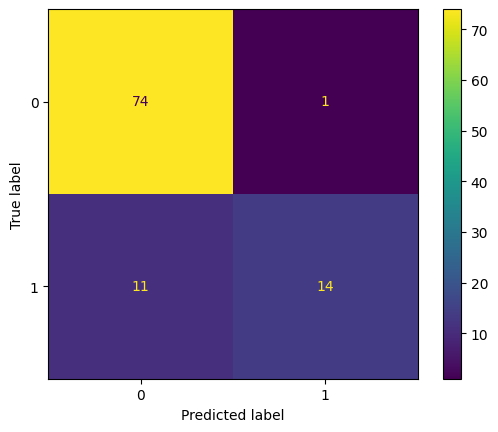

In [8]:
# Confusion matrix plot for ldaModel
ConfusionMatrixDisplay.from_estimator(ldaModel, X, y)
plt.show()

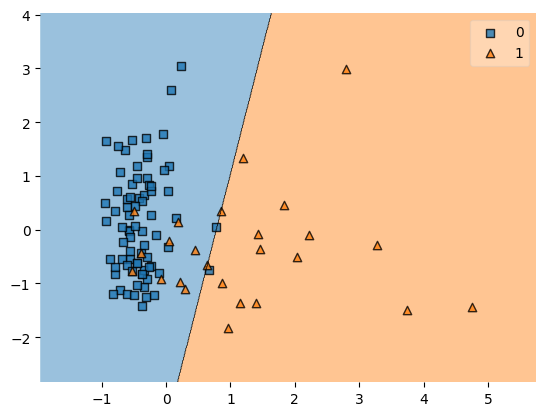

In [9]:
# Decision boundary plot for ldaModel
plot_decision_regions(X, np.ravel(y), clf=ldaModel)
plt.show()

In [10]:
# Initialize and fit a Gaussian naive Bayes model
gnbModel = GaussianNB()
gnbModel.fit(X, np.ravel(y))

GaussianNB()

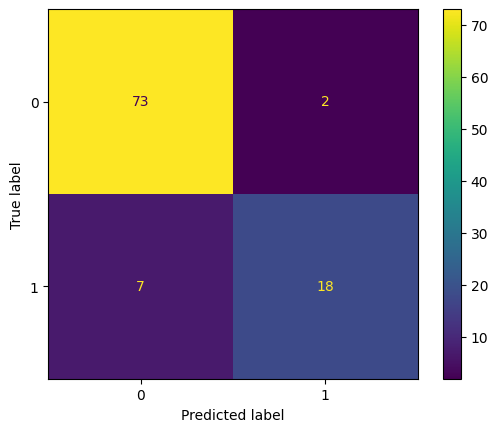

In [11]:
# Confusion matrix plot for gnbModel
ConfusionMatrixDisplay.from_estimator(gnbModel, X, y)
plt.show()

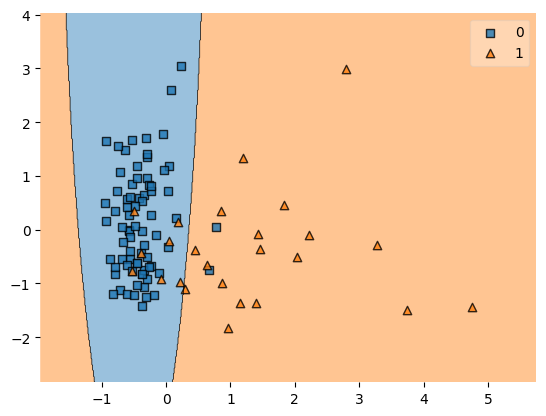

In [12]:
# Decision boundary plot for ldaModel
plot_decision_regions(X, np.ravel(y), clf=gnbModel)
plt.show()

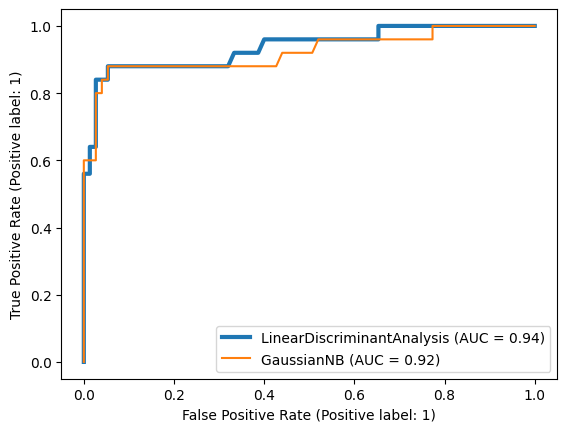

In [13]:
# ROC curves for both ldaModel and gnbModel

# ROC curve for ldaModel
lda_plot = RocCurveDisplay.from_estimator(ldaModel, X, y, linewidth=3)

# ROC curve for gnbModel, added to lda_plot by adding ax=lda_plot.ax_
gnb_plot = RocCurveDisplay.from_estimator(gnbModel, X, y, ax=lda_plot.ax_, linewidth=1.5)
plt.show()

In [14]:
# Compute AUC for ldaModel
ldaAUC = roc_auc_score(y, ldaModel.predict_proba(X)[:, 1])
print('LDA AUC = ', ldaAUC)

# Compute AUC for gnbModel
gnbAUC = roc_auc_score(y, gnbModel.predict_proba(X)[:, 1])
print('GaussianNB AUC = ', gnbAUC)

LDA AUC =  0.9365333333333333
GaussianNB AUC =  0.9221333333333334


## Multi-class outcome, two input features

In [15]:
# Create integer-valued diabetes
df['diabetes_int'] = df['diabetes'].replace(to_replace = ['no','pre', 'yes'],
                                                      value = [int(0), int(1), int(2)])

# Define input features and output features
X = df[['glucose', 'cholesterol']]
yMC = df[['diabetes_int']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
# Initialize and fit a k-nearest neighbors model
knnModel = KNeighborsClassifier(n_neighbors=7)
knnModel.fit(X, np.ravel(yMC))

KNeighborsClassifier(n_neighbors=7)

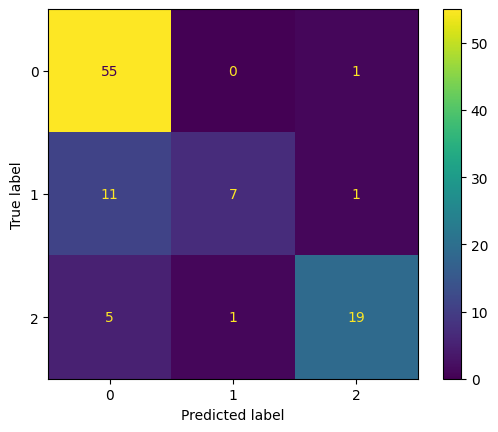

In [18]:
# Confusion matrix plot for knnModel
ConfusionMatrixDisplay.from_estimator(knnModel, X, yMC)
plt.show()

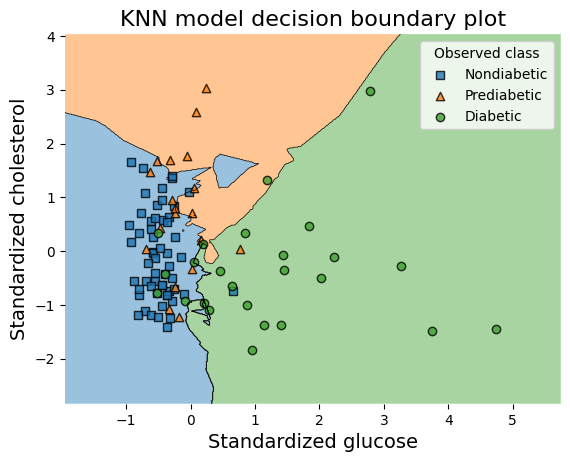

In [19]:
# Plot decision boundary regions
p=plot_decision_regions(X, np.ravel(yMC), clf=knnModel)

# Add title and axis labels
p.set_title('KNN model decision boundary plot', fontsize=16)
p.set_xlabel('Standardized glucose', fontsize=14)
p.set_ylabel('Standardized cholesterol', fontsize=14)

# Add legend
L = plt.legend(title='Observed class')
L.get_texts()[0].set_text('Nondiabetic')
L.get_texts()[1].set_text('Prediabetic')
L.get_texts()[2].set_text('Diabetic')

plt.show()

## Logistic regression model, binary outcome

In [20]:
# Define input features and output features
X = df[['glucose', 'cholesterol']]
y = df[['outcome']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize and fit a logistic regression model
LRModel = LogisticRegression(penalty=None)
LRModel.fit(X, np.ravel(y))

LogisticRegression(penalty=None)

### Add code below to generate plots for the fitted logistic regression model